In [16]:
import pandas as pd # linear algebra
import numpy as np  # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import scipy.stats as ss
import sklearn as sk
import seaborn as sns # visualization
from matplotlib.pyplot import suptitle
from seaborn import set
import matplotlib.pyplot as plt # for plotting
from statsmodels.graphics.mosaicplot import mosaic

from matplotlib import colors as mcolors
from pandas import DataFrame, read_html
%matplotlib inline
from scipy import stats # statistical analysis
from scipy.stats import chisquare

sns.set()

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
#from imblearn.over_sampling import SMOTE
#import xgboost

# Import statements required for Plotly 
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')


# For clustering:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import cdist

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


# For classifications:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import os

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

#Do I need these (for decision trees):
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

# K-Means
from sklearn.cluster import KMeans
import sklearn as sk
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt


from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import train_test_split

import sklearn.decomposition as skd
import sklearn.preprocessing as skp
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


In [17]:
attrition_data = pd.read_csv('/Users/yukolopez/Practice/SI618Works/FinalProject/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [18]:
# Convert EmployeeNumber colum to DataFrame index: 
attrition_data.set_index('EmployeeNumber', inplace=True)

In [19]:
# making sure no spaces before/after each column names.
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [20]:
# checking to see if missing values exist: 
attrition_data.isnull().sum(axis = 0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [21]:
attrition = attrition_data.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1) 
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [22]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

In [23]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


The DataFrame, attrition, has four columns removed from the original DataFrame, attrition_data, leaving out 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'.  

***


Below, .describe() is applied to the DataFrame, attrition, except that each column is specified.  This way, the result of .describe() will show all the contents.

In [24]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


***  

Further, the following two separate DataFrame are created: (1) number_data, which consists of only numerica data, and (2) categorical_data, which consists of only categorical data.  

In [25]:
number_data = attrition_data[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
number_data

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,
1,41,1102,1,94,2,5993,19479,8,11,0,8,0,6,4,0,5
2,49,279,8,61,2,5130,24907,1,23,1,10,3,10,7,1,7
4,37,1373,2,92,1,2090,2396,6,15,0,7,3,0,0,0,0
5,33,1392,3,56,1,2909,23159,1,11,0,8,3,8,7,3,0
7,27,591,2,40,1,3468,16632,9,12,1,6,3,2,2,2,2
8,32,1005,2,79,1,3068,11864,0,13,0,8,2,7,7,3,6
10,59,1324,3,81,1,2670,9964,4,20,3,12,3,1,0,0,0
11,30,1358,24,67,1,2693,13335,1,22,1,1,2,1,0,0,0
12,38,216,23,44,3,9526,8787,0,21,0,10,2,9,7,1,8


In [26]:
categorical_data = attrition_data[['Attrition', 'Gender', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
                            'PerformanceRating', 'RelationshipSatisfaction','WorkLifeBalance',]]
categorical_data

,Attrition,Gender,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
EmployeeNumber,,,,,,,,,
1,Yes,Female,2,2,3,4,3,1,1
2,No,Male,1,3,2,2,4,4,3
4,Yes,Male,2,4,2,3,3,2,3
5,No,Female,4,4,3,3,3,3,3
7,No,Male,1,1,3,2,3,4,3
8,No,Male,2,4,3,4,3,3,2
10,No,Female,3,3,4,1,4,1,2
11,No,Male,1,4,3,3,4,2,3
12,No,Male,3,4,2,3,4,2,3


---
Applying NumPy's .mean(), .median(), and .mode(), to double-check the results for the selected column, 'MonthlyIncome'.  

In [27]:
mean_monthly_income = np.mean(attrition_data['MonthlyIncome'])
median_monthly_income = np.median(attrition_data['MonthlyIncome']) 
mode_monthly_income = stats.mode(attrition_data['MonthlyIncome']) 

print(mean_monthly_income, median_monthly_income, mode_monthly_income)

#Note the skewness of mean_monthly_income compared to median_monincome

6502.931292517007 4919.0 ModeResult(mode=array([2342]), count=array([4]))


---
Further, the percentile range (95%) for "MonthlyIncome", the variance, and the standard deviation
are calculated to get a further sense for the shape of the dataset:  

In [28]:
# Measuring DISPERSION:

print("Monthly Income Percentile Range, Variance, and Standard Deviation are: ")
print("95% Percentile Range($): ", np.percentile(attrition_data['MonthlyIncome'],2.5),"-",np.percentile(attrition_data['MonthlyIncome'],97.5))
print("Variance($): ", np.var(attrition_data['MonthlyIncome']))
print("Standard Deviation($): ", np.std(attrition_data['MonthlyIncome']))  # this should be the square root of variance

Monthly Income Percentile Range, Variance, and Standard Deviation are: 
95% Percentile Range($):  2010.175 - 19191.925
Variance($):  22149778.937456165
Standard Deviation($):  4706.355164823004


---
Further notes on the dataset:  
* Within in the dataset, there are 588 female and 882 male, the total 1,470 datapoints, 
with the gender ratio 40% for female, and 60% for male, respectively (see the output for 
attrition_gender_ratio, below.  
* Further, for the Attrition/Yes group, the 37% of those who had attritioin are female 
while 63% are male.  
* For the Attrition/No group, 41% are female while 59% are male. 
* This appears as though that for Attrition/No group, there is no apparent gender difference
as the gender ratio in this group as the dataset's overal gender ratio is 4(female):6(male).  
* This will be explored further below.

In [29]:
attrition_gender_ratio = attrition_data.pivot_table(index='Attrition', columns='Gender', aggfunc='size',
                                                    fill_value=0)

# calculate ratios
sums = attrition_gender_ratio[['Female', 'Male']].sum(axis=1)
attrition_gender_ratio['FemaleRatio'] = attrition_gender_ratio['Female'] / sums
attrition_gender_ratio['MaleRatio'] = attrition_gender_ratio['Male'] / sums
attrition_gender_ratio

Gender,Female,Male,FemaleRatio,MaleRatio
Attrition,,,,
No,501,732,0.406326,0.593674
Yes,87,150,0.367089,0.632911


***
*** 


### <font color="darkblue">Exploratory Question 1: ***"How Does Income Income Affect Attrtion?"***: ###


First, a simple distribution is plotted for MonthlyIncome:  

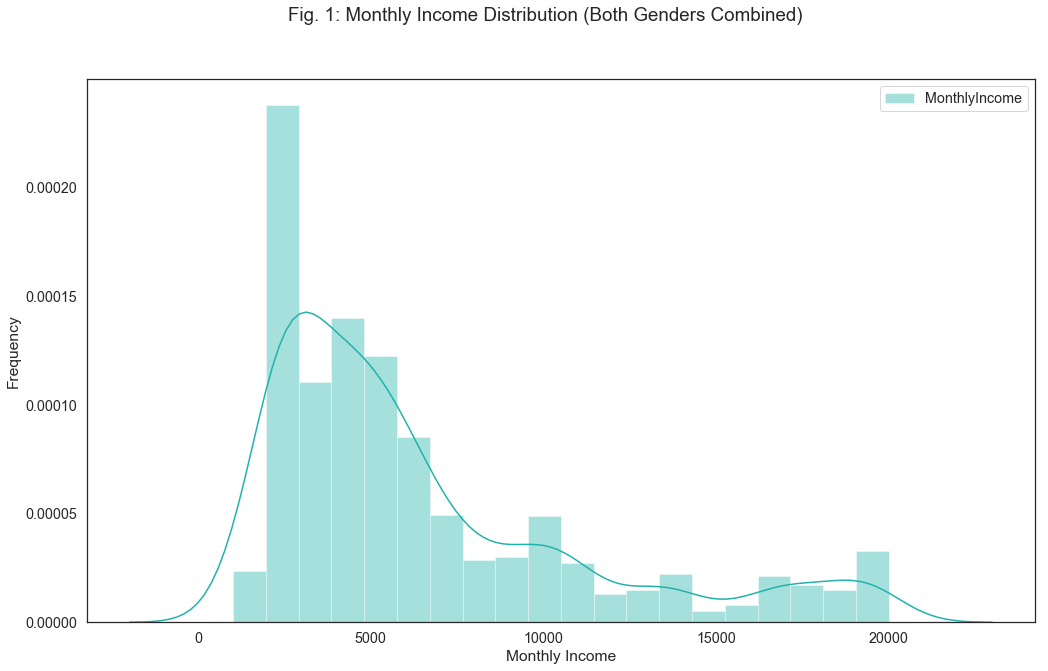

In [30]:
# Plot Female and Male in same plot
fig, axes = plt.subplots(1, 1, figsize=(17, 10))
sns.distplot(attrition_data[['MonthlyIncome']], axlabel=None, label='MonthlyIncome', color='lightseagreen')
plt.legend()
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
suptitle("Fig. 1: Monthly Income Distribution (Both Genders Combined)")
plt.show()

The distribution for Monthly Income is skewed to the right, confirming that the mean for Monthly Income calculated earlier is the result of this skewness as a small portion of the monthly incomes are almost 3-4 times higher than the majority.

Next, MonthlyIncome distributions by Gender will be plotted to see if any apparent gender difference exists:  

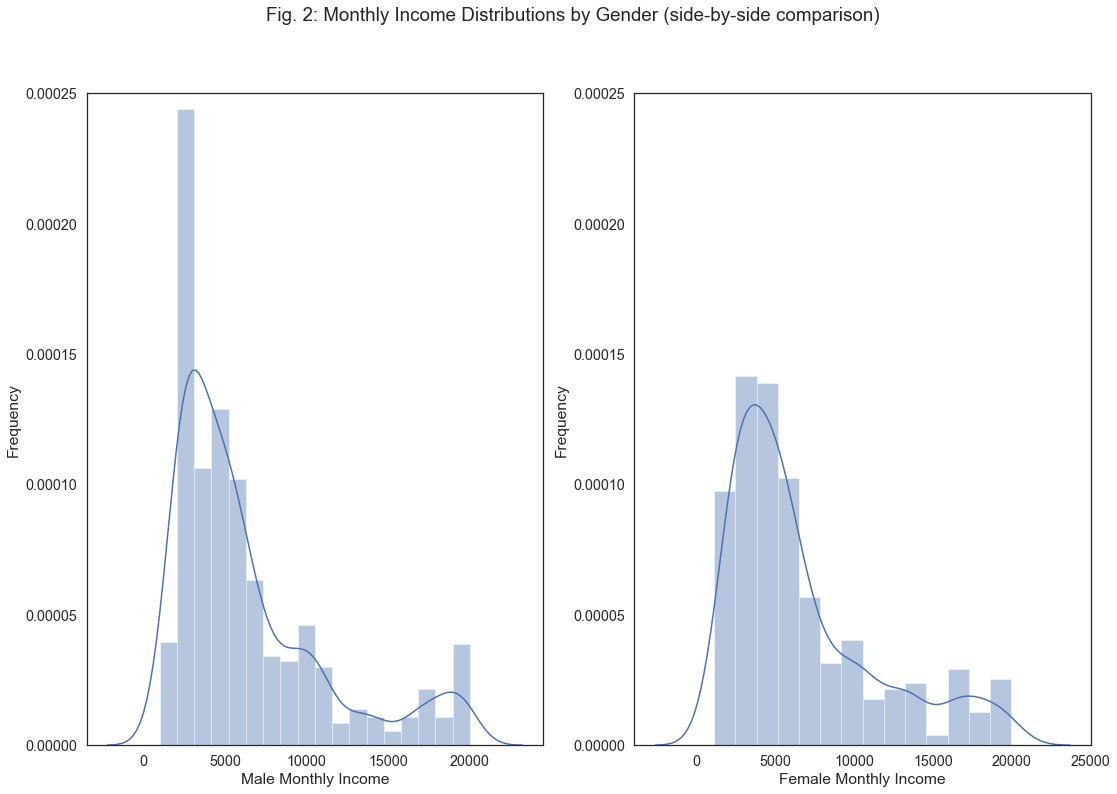

In [31]:
# Plot Female and Male in same plot
fig, axes = plt.subplots(1, 2, figsize=(18, 12))
attrition_data_M = attrition_data.loc[attrition_data['Gender'] == 'Male']
attrition_data_F = attrition_data.loc[attrition_data['Gender'] == 'Female']

sns.distplot(attrition_data_M[['MonthlyIncome']], axlabel=None, label='Male Monthly Income', ax=axes[0])
sns.distplot(attrition_data_F[['MonthlyIncome']], axlabel=None, label='Female Monthly Income', ax=axes[1])
axes[0].set_xlabel("Male Monthly Income")
axes[0].set_ylabel("Frequency")
axes[1].set_xlabel("Female Monthly Income")
axes[1].set_ylabel("Frequency")
suptitle("Fig. 2: Monthly Income Distributions by Gender (side-by-side comparison)")
ylim = [0, .00025]
axes[0].set_ylim(ylim)
axes[1].set_ylim(ylim)
plt.show()

A superimposed version of the above distributions for an easier comparison:  

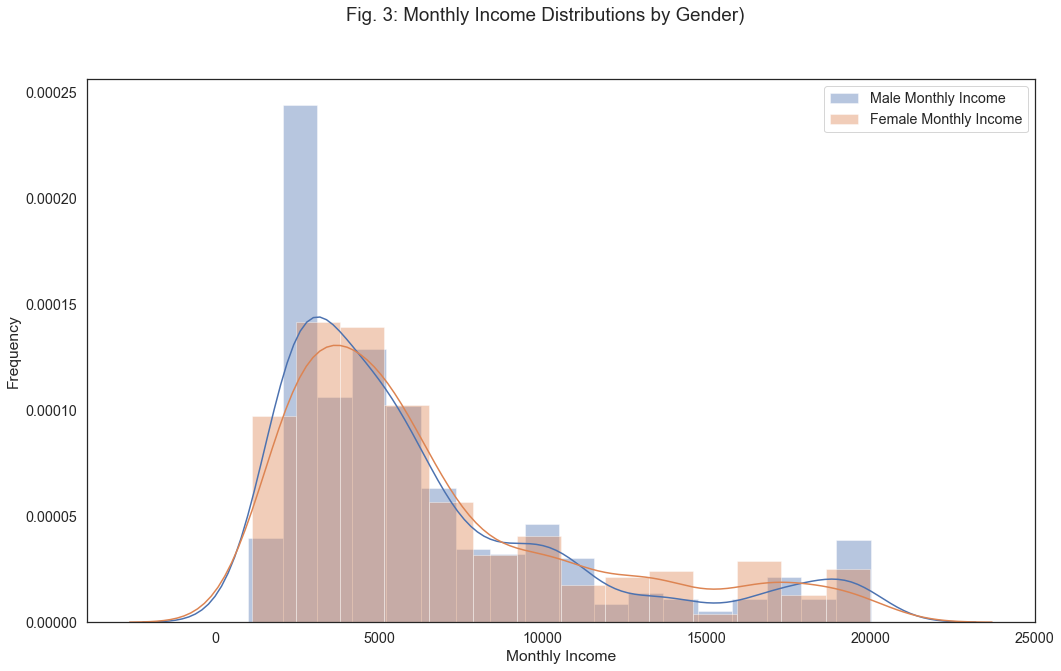

In [32]:
# Plot Female and Male in same plot
fig, axes = plt.subplots(1, 1, figsize=(17, 10))
attrition_data_M = attrition_data.loc[attrition_data['Gender'] == 'Male']
attrition_data_F = attrition_data.loc[attrition_data['Gender'] == 'Female']

sns.distplot(attrition_data_M[['MonthlyIncome']], axlabel=None, label='Male Monthly Income')
sns.distplot(attrition_data_F[['MonthlyIncome']], axlabel=None, label='Female Monthly Income')
plt.legend()
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
suptitle("Fig. 3: Monthly Income Distributions by Gender)")
plt.show()

In terms of the shapes of the distributions, there is no apparent difference in distributions between the genders.  
Next, all the income related numeric data -MonthlyIncome, DailyRate, HourlyRate, and MonthlyRate are plotted for both gender combined to see their respective distributions:  

Text(0.5, 0.98, 'Fig. 4: Distributions of Monthly Income, Daily Rate, Hourly Rate & Monthly Rate')

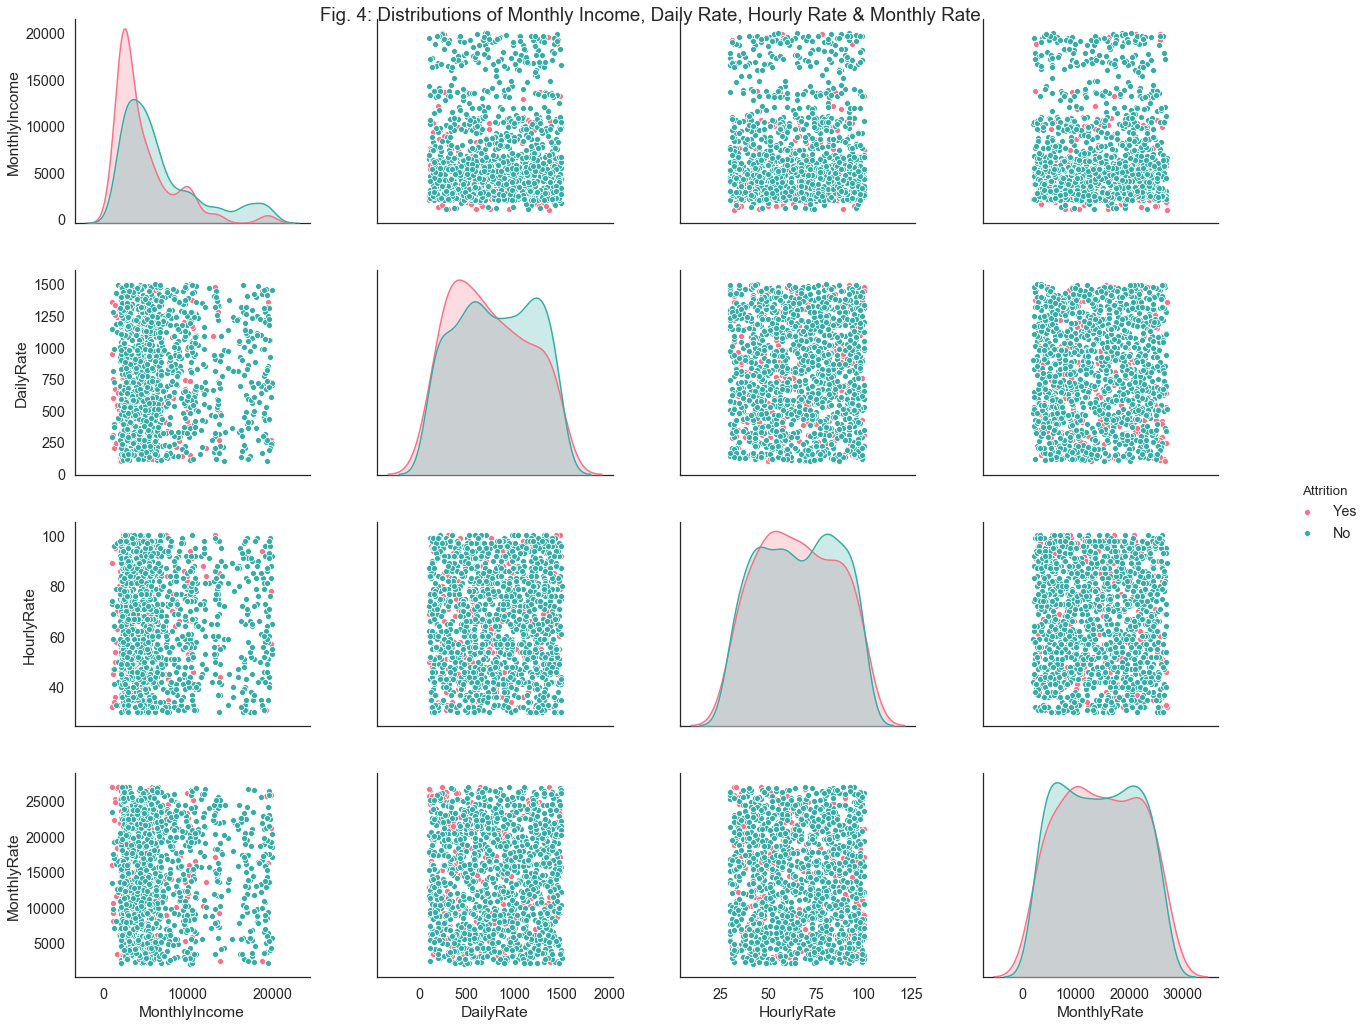

In [33]:
g = sns.pairplot(attrition_data, x_vars=["MonthlyIncome", "DailyRate", "HourlyRate", "MonthlyRate"], 
                 y_vars=["MonthlyIncome", "DailyRate", "HourlyRate", "MonthlyRate"], hue='Attrition', 
                 palette="husl")
g.fig.set_figheight(15)
g.fig.set_figwidth(20)
suptitle("Fig. 4: Distributions of Monthly Income, Daily Rate, Hourly Rate & Monthly Rate")

By default, this function will create a grid of Axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

These pair plot distributions indicate that Monthly Income and Daily Rate indicate in their univariate distributions that the lower the income, higher the attrition will be.  A similar is true for HourlyRate and MonthlyRate though not as visibly striking as MontlyIncome and DailyRate.

***

To make the visual analysis easier, the MonthlyIncome values are convered into ranges (brackets), 
in which each MonthlyIncome values are categorized into:    

In [34]:
step = 2500
for start in range(0, attrition_data['MonthlyIncome'].max(), step):
  # 0 2500 5000 
  rows = (attrition_data['MonthlyIncome'] >= start) & (attrition_data['MonthlyIncome'] <= start + step)
  attrition_data.loc[rows, 'MonthlyIncomeBracket'] = start + step
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeBracket
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,7500.0
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,80,1,10,3,3,10,7,1,7,7500.0
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,2500.0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,5000.0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,80,1,6,3,3,2,2,2,2,5000.0


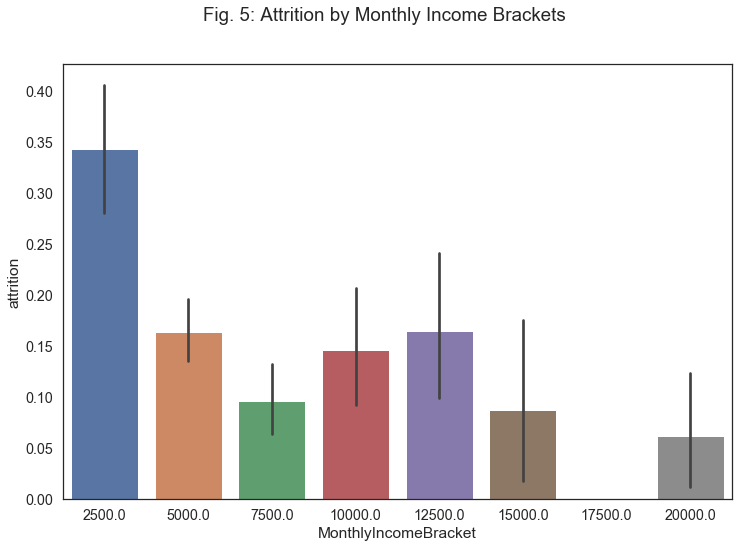

In [35]:
fig, ax = plt.subplots(1, figsize=(12, 8))
attrition_data['attrition'] = attrition_data['Attrition'].replace({'Yes': 1, 'No': 0})
sns.barplot(x='MonthlyIncomeBracket', y='attrition', data=attrition_data)
suptitle("Fig. 5: Attrition by Monthly Income Brackets ")
plt.show()


***  

As seen in the above barplot, the monthly income group with the highest attrition is the lowest monthly income group (2500 dollars) followed by the next lowest group (5000 dollars). This plot appears to show that the lower the income, higher the attrition is likely.  For further contexts, MonthlyIncome, HourlyRate, DailyRate, and MonthlyRate are plotted against Attrition.

#### (1) Visualizing the relationship between MonthlyIncome and Attrition: ####  

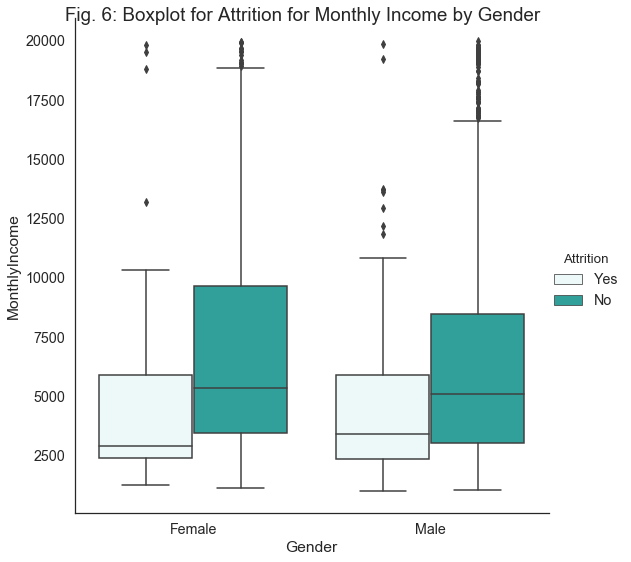

In [36]:
#fig,axes = plt.subplots(1, figsize=(20,8))
g = sns.catplot(x='Gender', y='MonthlyIncome', hue='Attrition', data=attrition_data, kind='box', height=8, 
                aspect=1, color="lightseagreen")
suptitle("Fig. 6: Boxplot for Attrition for Monthly Income by Gender ")
plt.show()

#### (2) Visualizing the relationship between HourlyRate and Attrition: #### 

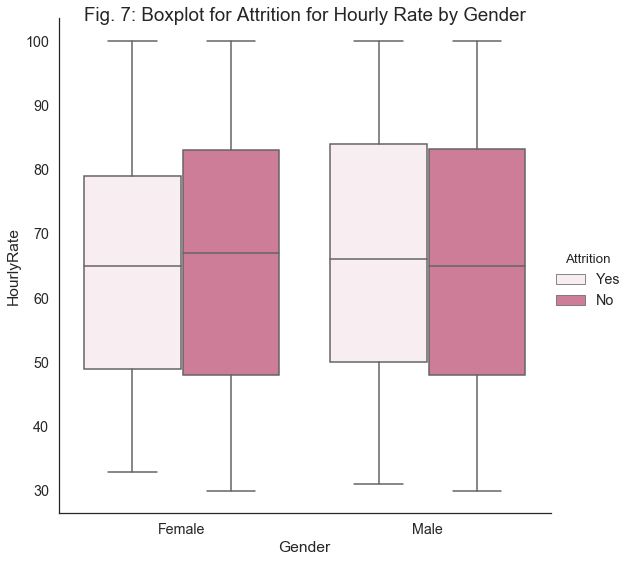

In [37]:
g = sns.catplot(x='Gender', y='HourlyRate', hue='Attrition', data=attrition_data, kind='box', height=8, 
                aspect=1, color='palevioletred')
suptitle("Fig. 7: Boxplot for Attrition for Hourly Rate by Gender ")
plt.show()

#### (3) Visualizing the relationship between DailyRate and Attrition: #### 

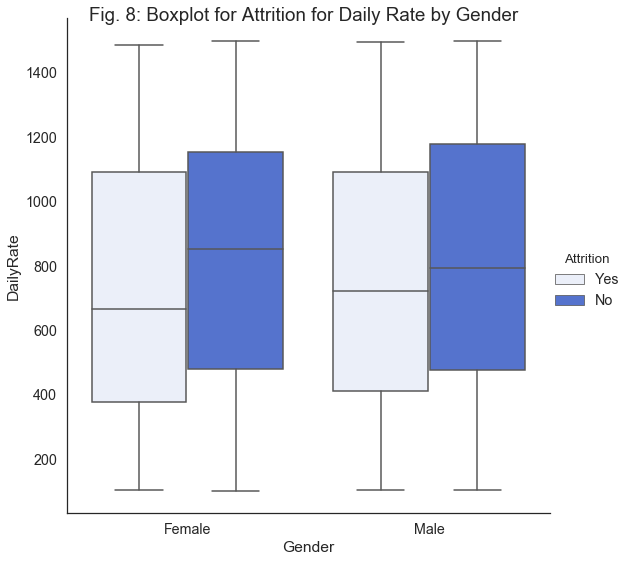

In [38]:
g = sns.catplot(x='Gender', y='DailyRate', hue='Attrition', data=attrition_data, kind='box', height=8, 
                aspect=1, color='royalblue')
suptitle("Fig. 8: Boxplot for Attrition for Daily Rate by Gender ")
plt.show()

#### (4) Visualizing the relationship between MonthlyRate and Attrition: #### 

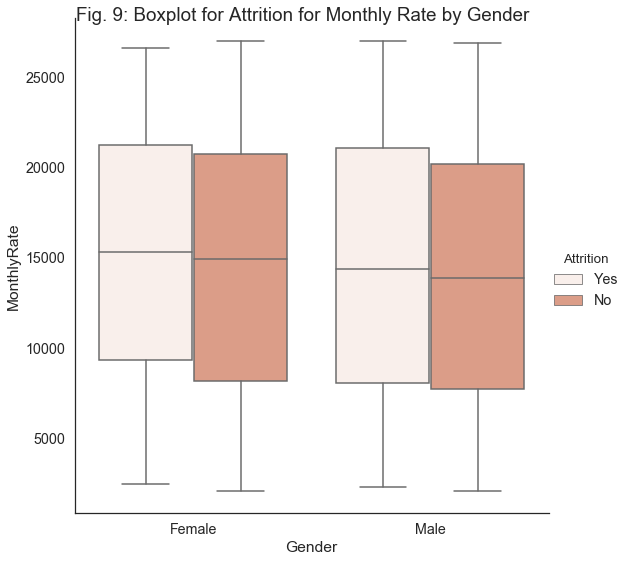

In [39]:
g = sns.catplot(x='Gender', y='MonthlyRate', hue='Attrition', data=attrition_data,  
                kind='box', height=8, aspect=1, color='darksalmon')
suptitle("Fig. 9: Boxplot for Attrition for Monthly Rate by Gender ")
plt.show()

***

#### Observations from the boxplots (1) to (4): ####  
(1) Based on the boxplots above, MonthlyIncome distributions most strikingly show (see the 50-percentile mark)
that the individuals with Attrition/Yes tend to have lower incomes in both genders.  
The means for both genders shows that the incomes for the 50 percentile are approximately 2,500 dollars
for Attrition/Yes group while it is about 5,000 dollars for Attrition/No group.  Also notable is how 50% of the income distributions for Attrition/Yes groups in both genders (the boxes) are much shorter than that of its Attrition/No groups.  For the female Attrition/No group, the 50% of the distribution lies somewhere
between about 3200 dollars to 9600 dollars.  As for the male Attrition/No group, the 50% of the distribution lies somewhere between about 3500 dollars to 8500 dollars.  This observation is interesting in that just by
looking at the 50% distributions alone, and it appears as though female are earning more.  However, it is important to note that the male Attrition/No group has more outliers.  

(2) The distributions for DailyRate also show that individuals with Attrition/Yes tend to have lower incomes in both genders.  The means for the HourlyRate discrepancy for the female shows that the incomes for 
the 50 percentile are approximately 660 dollars for Attrition/Yes group while it is about 830 dollars for 
Attrition/No group.  The same is true for the male counterparts.  While the discrepancy is not as wide as the female one, the differences between the means are approximately between 700 dollars to 750 dollars, which can
make a significant difference in their paychecks (Note: No outliers exist). 

(3) The distributions for HourlyRate indicates that the female Attrition/Yes earn less than the Attrition/No group
while the male Attrition/Yes group is earning slightly more than its Attrition/No group.

(4) For the MonthlyRate distributions, the Attrition/No groups for both male and female have slightly higher than
that of the ones for the Attrition/Yes groups.  

(5) Although not all the distributions show that the lower rates of income/wages always indicate higher Attrition/Yes, 
more than half the distributions above may warrant the following hypothesis:  

H0: The lower income/wages do not affect the job attrition.  
H1: The lower income/wages do affect the job attrition.

(6) To test the hypothesis, t-test is performed as follows:

In [40]:
stats.ttest_ind(attrition_data[attrition_data.Attrition == 'Yes']['MonthlyIncome'], 
                attrition_data[attrition_data.Attrition == 'No']['MonthlyIncome'])

Ttest_indResult(statistic=-6.203935765608938, pvalue=7.14736398535381e-10)

Results:  
+ The result of the t-test performed above, the calculated p-value (pvalue=7.14736398535381e-10) is significantly smaller than 0.05.
+ This indicates the strong evidence against the null hypothesis H0=Income makes no difference in attrition.  
+ Therefore, I can safely reject the null hypothesis, thus conclude that the alternative hypothesis is true,
income does make a difference in attrition.  

***  

Before concluding the exploration on the question of income and attrition, the following tabular information is created:  

In [41]:
attrition_pivot = attrition_data.pivot_table(index=['Attrition', 'MonthlyIncomeBracket'], columns=['Gender'],
                           values='Age', aggfunc=lambda x: len(x) if len(x) != np.nan else 0, margins=True)
attrition_pivot

Gender                          Female  Male   All
Attrition MonthlyIncomeBracket                    
No        2500.0                    53    94   147
          5000.0                   175   264   439
          7500.0                   117   163   280
          10000.0                   40    71   111
          12500.0                   34    42    76
          15000.0                   30    22    52
          17500.0                   28    24    52
          20000.0                   24    52    76
Yes       2500.0                    25    52    77
          5000.0                    36    50    86
          7500.0                    10    20    30
          10000.0                    9    10    19
          12500.0                    3    12    15
          15000.0                    1     4     5
          20000.0                    3     2     5
All                                588   882  1470

To put the above numbers in perspective, the following pivot table is created to see the gender ratios for each monthly income brackets:  

In [42]:
attrition_pivot = attrition_pivot.rename(index={'All': 'Total'}, columns={'All': 'Total'})
attrition_pivot.loc[:, 'Male'] = (attrition_pivot.loc[:, 'Male'] / attrition_pivot.loc[:, 'Total']) * 100
attrition_pivot.loc[:, 'Female'] = (attrition_pivot.loc[:, 'Female'] / attrition_pivot.loc[:, 'Total']) * 100
attrition_pivot.loc[:, 'total_prcnt'] = (attrition_pivot.loc[:, 'Total'] / attrition_pivot.loc[:, 'Total']) * 100
attrition_pivot

Gender                             Female       Male  Total  total_prcnt
Attrition MonthlyIncomeBracket                                          
No        2500.0                36.054422  63.945578    147        100.0
          5000.0                39.863326  60.136674    439        100.0
          7500.0                41.785714  58.214286    280        100.0
          10000.0               36.036036  63.963964    111        100.0
          12500.0               44.736842  55.263158     76        100.0
          15000.0               57.692308  42.307692     52        100.0
          17500.0               53.846154  46.153846     52        100.0
          20000.0               31.578947  68.421053     76        100.0
Yes       2500.0                32.467532  67.532468     77        100.0
          5000.0                41.860465  58.139535     86        100.0
          7500.0                33.333333  66.666667     30        100.0
          10000.0               47.368421  52.631579     19        100.0
          12500.0               20.000000  80.000000     15        100.0
          15000.0               20.000000  80.000000      5        100.0
          20000.0               60.000000  40.000000      5        100.0
Total                           40.000000  60.000000   1470        100.0

Observations:  
It is interesting to see that some of the income groups have a similar ratio to the overall dataset ratio (female:4, male:6).  
For example, looking at the groups for Attrition/No, the gender ratio (percentage) for the female is anywhere approximately between 36% to 45% for the income groups between 2500 and 12500, staying within the 10% range of the 40%.  
The 15000 dollar group for female Attrition/No is almost 58%, the highest percentage, for the female Attrition/No group.
Together with the 17500 dollar group, female in this income category show a higher percentage than that of the males
through the rate dramatically decreases for 20000 group.  

Looking at the Attrition/Yes group, the lower income groups do not seem to have anything striking in terms of gender differences, compared to the Attrition/No group.  However, looking at the income groups 12500, 15000, 
for the Attrition/Yes, the gender ratio is 2:8, meaning that only 20% of female are in these categories (only one female in each of these two groups).  Even though the 20000 income group indicates the 60% of the female is in this category, the row total within this category verifies that 3 out of 5 individuals, who are in this income category, are female, which does not appear to be significant.  Overall, it seems more notable to see the gender ratio differences in 12500 and 15000 dollars income categories for Attrition/Yes as these may be an indication that female tend to reach
the ceiling of highest earning potentials compared to male whatever the case may be.  

Next, the topic of the Job Role/Job Level and Attrition is investigated.

***  


***  
***  

### <font color="darkblue">Exploratory Question: ***"Can Job Level and/or Job Role affect Attrition?"***: ###

Notes on the relevant columns: This topic involves categorical data mainly, JobLevel and JobRole.  
As mentioned earlier, JobLevel consists of 1 to 5 categories while JobRole consists of 9 job titles, 
(e.g.) Sales Representative, etc.  There is no clear group or boundaries between the JobLevel and JobRoles.
For instance, JobLevel 1 includes the JobRoles such as Sales Representative, Laboratory Technicians,  Research Scientist, etc., while JobLevel 2 can consist of all the said JobRoles.  For example, JobRole, "Manager" appears in JobLevel 3, 4, and 5.  That said, it is important to note that the lower number the JobLevel is, the income is smaller as shown in the below plot:  

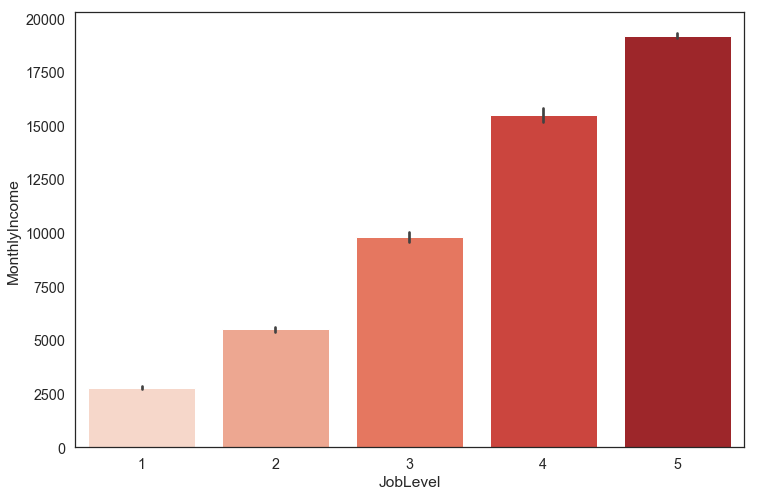

In [43]:
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.barplot(x='JobLevel', y='MonthlyIncome', data=attrition_data, palette='Reds')
plt.show()

First, a simple bar plot is created against Attrtion to see if a general trend exists.  

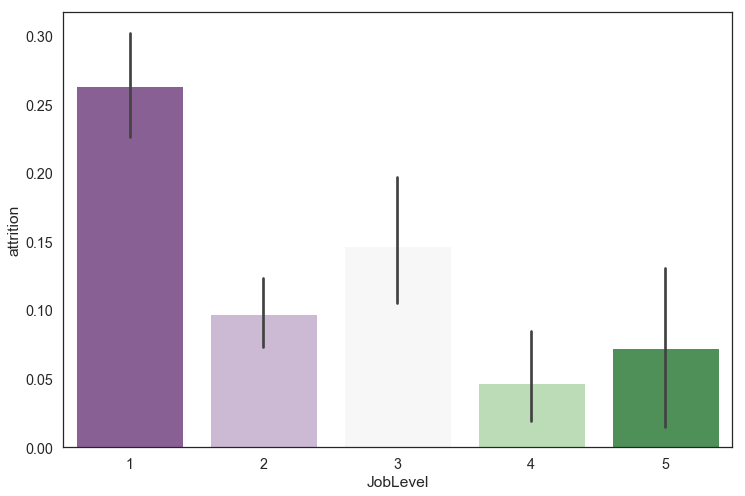

In [44]:
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.barplot(x='JobLevel', y='attrition', data=attrition_data, palette='PRGn')
plt.show()

Although there is no clean and clear trend is seen, the JobLevel 1 indicates the group's vulnerability to job attrition.  The figure for this group, 0.26-0.27 is much higher than the ones for JobLevel 4 and 5 ranging from approximately 0.04 to 0.075.  This observation is further confirmed by creating the following crosstab showing the percentages for each group.  

In [45]:
joblevel = pd.crosstab(attrition_data['Attrition'], attrition_data['JobLevel'], margins=True, normalize=True)
joblevel * 100

JobLevel,1,2,3,4,5,All
Attrition,,,,,,
No,27.210884,32.789116,12.653061,6.870748,4.353741,83.877551
Yes,9.727891,3.537415,2.176871,0.340136,0.340136,16.122449
All,36.938776,36.326531,14.829932,7.210884,4.693878,100.000000


The crosstab above shows that 16% of the dataset indicates job attrition (Attrition/Yes), almost 10% of  which belongs to the JobLevel 1.  This is nearly 63% of the total Attrition/Yes.  This observation leads to
the following hypothesis:

H0: The JobLevel does not affect Attrition.
H1: The JobLevel does affect Attrition (H0 is not True).

One-Way ANOVA will be performed to test this hypothesis.  To do so, a list needs to be created first so that the list variable can be passed onto the inside .f_oneway().   

In [46]:
joblevels = []
for i in range(1, 6):
  jl = attrition_data.loc[attrition_data['JobLevel'] == i, 'attrition']
  joblevels.append(jl)
stats.f_oneway(*joblevels)

F_onewayResult(statistic=19.0084454700361, pvalue=2.975150100310332e-15)

The calculated pvalue=2.975150100310332e-15, significantly smaller than 0.05.  Therefore, I can safely reject the null hypothesis (H0: The JobLevel does not affect Attrition).  


*** 


To investigate further, another relevant column, JobRole will be analyzed similarly.

First, a simple barplot is created for JobRoles against Attrition as follows:  


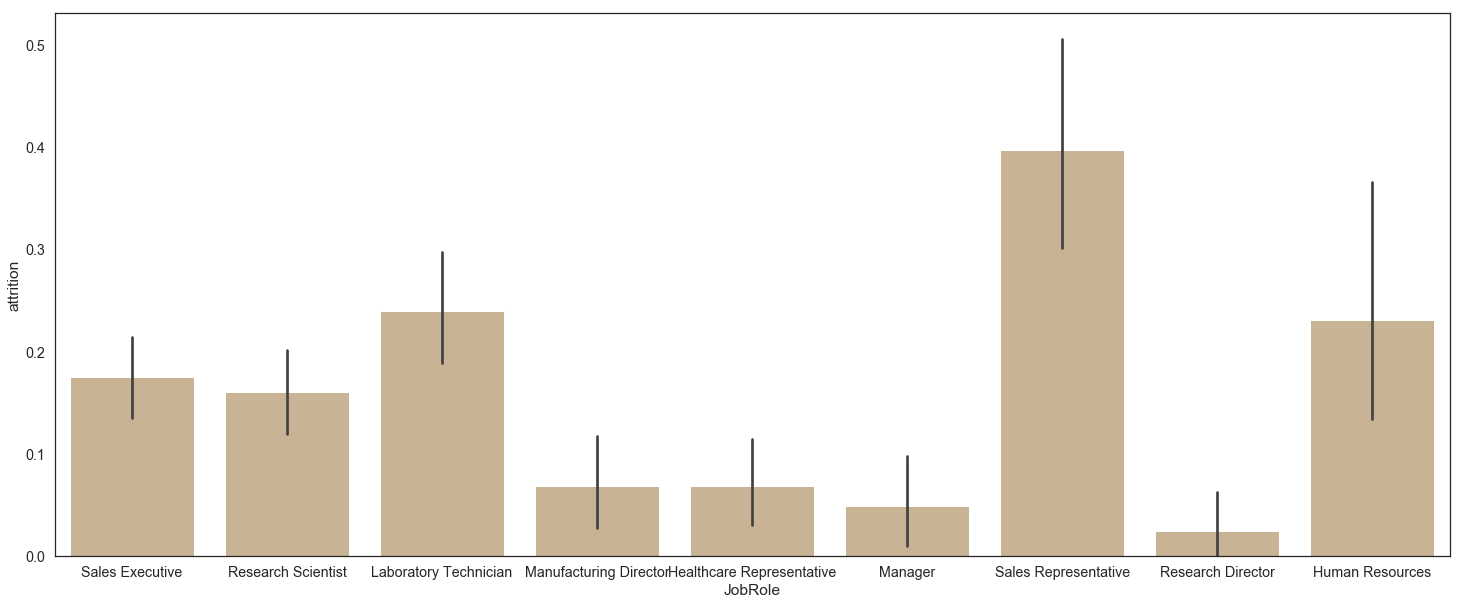

In [47]:
fig, ax = plt.subplots(1, figsize=(25, 10))
sns.barplot(x='JobRole', y='attrition', data=attrition_data, color='tan')
plt.show()

The bar graph above indicates that the Sales Representative, Laboratory Technician, and Human Resources professionals are more prone to job attrition compared to their counterparts.  

***
The following pivot table and crosstab are created to see the relationship between JobLevel and JobRole.  

In [48]:
levelandrole_pivot = attrition_data.pivot_table(index=['JobRole'], columns=['JobLevel'],
                           values='Attrition', aggfunc=lambda x: len(x) if len(x) != np.nan else 0, margins=True)
levelandrole_pivot

JobLevel,1,2,3,4,5,All
JobRole,,,,,,
Healthcare Representative,NaN,78.0,44.0,9.0,NaN,131
Human Resources,33.0,13.0,6.0,NaN,NaN,52
Laboratory Technician,200.0,56.0,3.0,NaN,NaN,259
Manager,NaN,NaN,12.0,47.0,43.0,102
Manufacturing Director,NaN,90.0,45.0,10.0,NaN,145
Research Director,NaN,NaN,28.0,26.0,26.0,80
Research Scientist,234.0,57.0,1.0,NaN,NaN,292
Sales Executive,NaN,233.0,79.0,14.0,NaN,326
Sales Representative,76.0,7.0,NaN,NaN,NaN,83


In [49]:
jobrole = pd.crosstab(attrition_data['Attrition'], attrition_data['JobRole'], margins=True, 
                      normalize=True)
jobrole * 100

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,All
Attrition,,,,,,,,,,
No,8.299320,2.721088,13.401361,6.598639,9.183673,5.306122,16.666667,18.299320,3.401361,83.877551
Yes,0.612245,0.816327,4.217687,0.340136,0.680272,0.136054,3.197279,3.877551,2.244898,16.122449
All,8.911565,3.537415,17.619048,6.938776,9.863946,5.442177,19.863946,22.176871,5.646259,100.000000


As the table above indicates, the JobRoles such as Sales Representative, Laboratory Technician,  and Human Resources professionals occupy the lower JobLevel, mostly in 1, followed by 2, and very few in 3.  As seen earlier, the JobLevel 1 is the group that is particularly high in job attrition.  

The following hypothesis is formulated as the result of these observations:

H0: JobRole does not affect Attrition  
H1: JobRole does affect Attrition (H0 is not True).


In [50]:
jobroles = []
for j in attrition_data['JobRole'].unique(): 
  jr = attrition_data.loc[attrition_data['JobRole'] == j, 'attrition']
  jobroles.append(jr)
  # anova needs a list to be paassed onto
print(len(jobroles))
stats.f_oneway(*jobroles)

9


F_onewayResult(statistic=11.374753732967797, pvalue=9.562555450860023e-16)

The calculated pvalue=9.562555450860023e-16, is significantly smaller than 0.05.  Therefore, I can safely reject the null hypothesis (H0: The JobRole does not affect Attrition).  


For the analyses and results of JobLevel and JobRole taken together, I conclude that JobLevel and JobRole may lead to job attrition.  

***  
***  


### <font color="darkblue">3. Hours of Commitment: ###

To see if the job attrition can be affected by the total time the individuals may have to spend for 
in and outside the office associated with work, the following columns are analyzed:  
(1) 'DistanceFromHome'  
(2) 'MaritalStatus',  
(3) 'OverTime',  
(4) 'BusinessTravel'

Note: MaritalStatus is included in this analysis based on the possibility that whether the individual is single, married, or divorced, may play a role in the job attrition especially if one must not only travel but also have to have over time, and/or commuting distance is long.  Or, it could be the case that the single ones are more likely to have job attritions based on the assumption that they do not have financial obligations to their
families and children, allowing them to feel more at ease about resining.  Either way, this column seems to be an interesting one to analyze together.    

The following code is to categorize commuting distances ranging from 1 to 29 to make analysis and subsequent 
visualization easier:  

In [51]:
step = 5
for start in range(0, attrition_data['DistanceFromHome'].max(), step):
  # 0 2500 5000 
  rows = (attrition_data['DistanceFromHome'] >= start) & (attrition_data['DistanceFromHome'] <= start + step)
  if start + step > 24:
    attrition_data.loc[rows, 'DistanceRange'] = 25
  else:
    attrition_data.loc[rows, 'DistanceRange'] = start + step
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeBracket,attrition,DistanceRange
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,8,0,1,6,4,0,5,7500.0,1,5.0
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,10,3,3,10,7,1,7,7500.0,0,10.0
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,2500.0,1,5.0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,8,3,3,8,7,3,0,5000.0,0,5.0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,6,3,3,2,2,2,2,5000.0,0,5.0



The following is the summary of the selected columns, in which 'DistanceRange' is a new column as the 
result of the above code to categorize 'DistanceFromHome'.   



In [52]:
# Hours of Commitment's relevant colums in a pivot table:
attrition_pivot = attrition_data.pivot_table(index=['OverTime', 'BusinessTravel', 'DistanceRange', 'MaritalStatus'], 
                                             columns=['Gender','Attrition'], values='Age', 
                                             aggfunc=lambda x: len(x) if len(x) != np.nan else 0, margins=True)
attrition_pivot

Gender                                                 Female         Male  \
Attrition                                                  No   Yes     No   
OverTime BusinessTravel    DistanceRange MaritalStatus                       
No       Non-Travel        5.0           Divorced         2.0   NaN   10.0   
                                         Married          8.0   NaN   17.0   
                                         Single           4.0   NaN    3.0   
                           10.0          Divorced         1.0   NaN   10.0   
                                         Married          4.0   NaN    3.0   
                                         Single           2.0   NaN   11.0   
                           15.0          Divorced         1.0   NaN    NaN   
                                         Married          2.0   NaN    2.0   
                                         Single           1.0   NaN    3.0   
                           20.0          Divorced         1.0   NaN    2.0   
                                         Married          NaN   NaN    1.0   
                                         Single           NaN   NaN    4.0   
                           25.0          Divorced         2.0   NaN    2.0   
                                         Married          4.0   NaN    5.0   
                                         Single           1.0   NaN    4.0   
         Travel_Frequently 5.0           Divorced         7.0   NaN    7.0   
                                         Married         11.0   NaN   18.0   
                                         Single           9.0   5.0   13.0   
                           10.0          Divorced         1.0   2.0    8.0   
                                         Married          8.0   NaN   11.0   
                                         Single           4.0   1.0    2.0   
                           15.0          Divorced         3.0   NaN    5.0   
                                         Married          3.0   NaN    6.0   
                                         Single           2.0   2.0    3.0   
                           20.0          Divorced         1.0   NaN    1.0   
                                         Married          2.0   NaN    3.0   
                                         Single           2.0   NaN    2.0   
                           25.0          Divorced         3.0   NaN    2.0   
                                         Married          8.0   2.0    6.0   
                                         Single           6.0   2.0    1.0   
...                                                       ...   ...    ...   
Yes      Travel_Frequently 5.0           Married          3.0   NaN    7.0   
                                         Single           4.0   3.0    6.0   
                           10.0          Divorced         1.0   NaN    4.0   
                                         Married          NaN   3.0    3.0   
                                         Single           1.0   3.0    1.0   
                           15.0          Divorced         NaN   NaN    2.0   
                                         Married          NaN   NaN    1.0   
                                         Single           1.0   1.0    NaN   
                           20.0          Divorced         NaN   1.0    1.0   
                                         Married          NaN   1.0    3.0   
                                         Single           NaN   1.0    NaN   
                           25.0          Divorced         1.0   2.0    NaN   
                                         Married          3.0   NaN    3.0   
                                         Single           1.0   1.0    1.0   
         Travel_Rarely     5.0           Divorced         9.0   3.0    6.0   
                                         Married         15.0   3.0   22.0   
                                         Single          14.0   5.0   10.0   
                      

***  

#### (1) Visualizing the relatipnship between "DistanceFromHome" and "Attrition": ####
First, plotting DistanceRange and Attrtion in a simple bar graph.

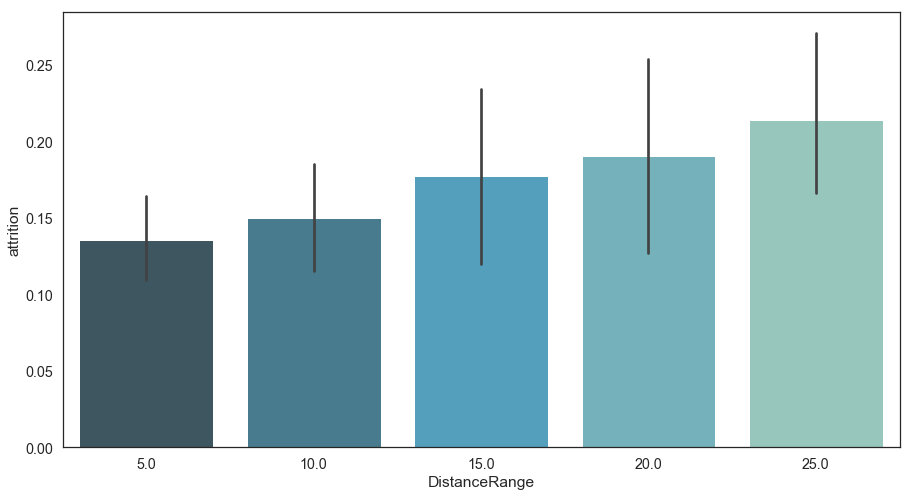

In [53]:
fig, ax = plt.subplots(1, figsize=(15, 8))
sns.barplot(x='DistanceRange', y='attrition', data=attrition_data, palette="GnBu_d")
plt.show()

The bargrph above clearly indicates that the longer the distance, the higher the Attrition/Yes is.

***  

Next, for the MaritalStatus and Attrition, bargraphs are plotted.  


#### (2) Visualizing the relatipnship between "MaritalStatus" and "Attrition": ####

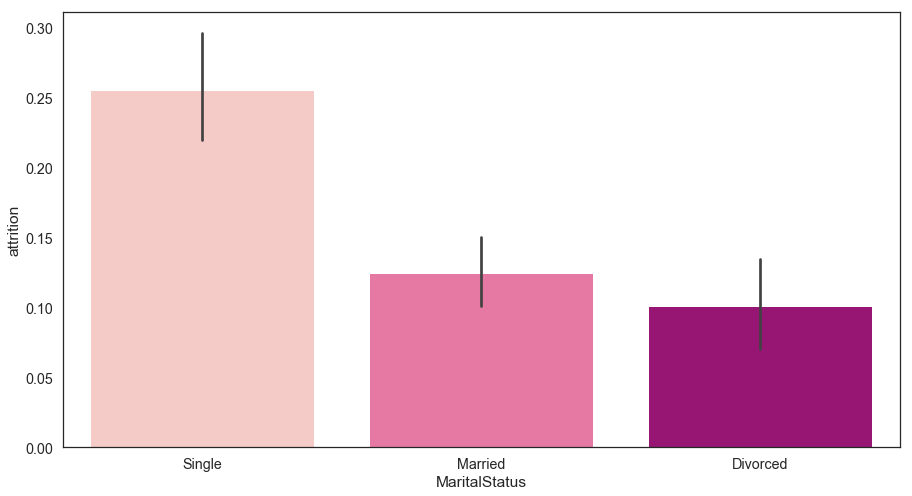

In [54]:
fig, ax = plt.subplots(1, figsize=(15, 8))
sns.barplot(x='MaritalStatus', y='attrition', data=attrition_data, palette="RdPu")
plt.show()

The bar graphs above show that the Single group is more likely to lead to job attrition with the much higher number, little over 0.25, than the ones for Married, and Divorced groups.  This may be because,  as briefly mentioned earlier, the singles are likely to have fewer obligations to family and children.  
Comparing the Single and the Divorced, one may think that why they are strikingly so different although divorced means, they are single in a general categorical sense.  However, the difference between the Single and the Divorced may be significant because of the potential financial burdens that the Divorced group may have to their former spouses, and especially to their children.  Compared to the Married group, the Divorced group cannot enjoy the tax benefits of filing tax jointly, which is often done by married couples.  The Divorced group is also more vulnerable to fewer healthcare benefits compared to its married counterparts.  With those high potential financial burdens, the tax, the healthcare, and possibly more, it is after costly to live the life alone while being financially responsible for others.  Whatever the true causes may be, this is an interesting graph to see.  

***  

#### (3) Visualizing the relatipnship between "OverTime" and "Attrition": ####

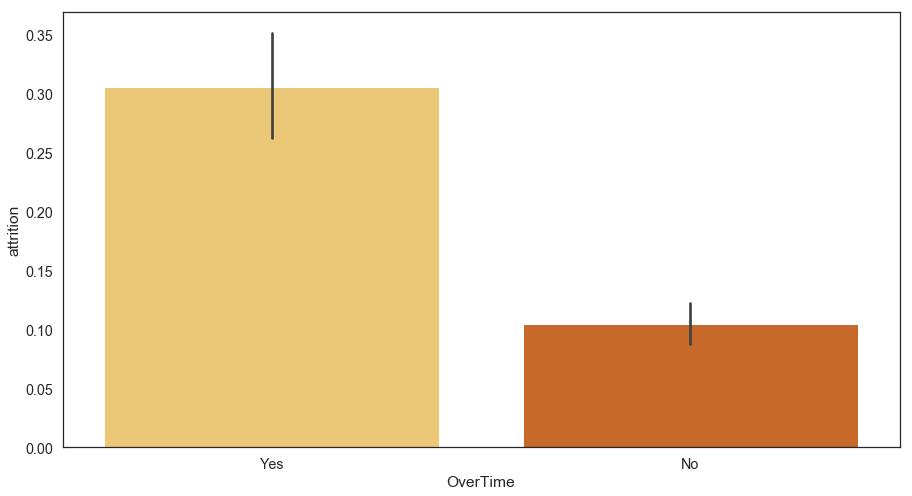

In [55]:
fig, ax = plt.subplots(1, figsize=(15, 8))
sns.barplot(x='OverTime', y='attrition', data=attrition_data, palette="YlOrBr")
plt.show()

The bar graph above shows a visually striking difference between the Attrition/Yes and Attrition/No group, where the former, the Attrition/Yes group is approximately three times larger than its counterpart, the Attrition/No group.  

Based on the p-value, 1.0e-21, there is a strong evidence against the nulll hypothesis, meaning that OverTime does affect Attrition.

***  

---  
#### (4) Visualizing the relatipnship between "BusinessTravel" and "Attrition": ####

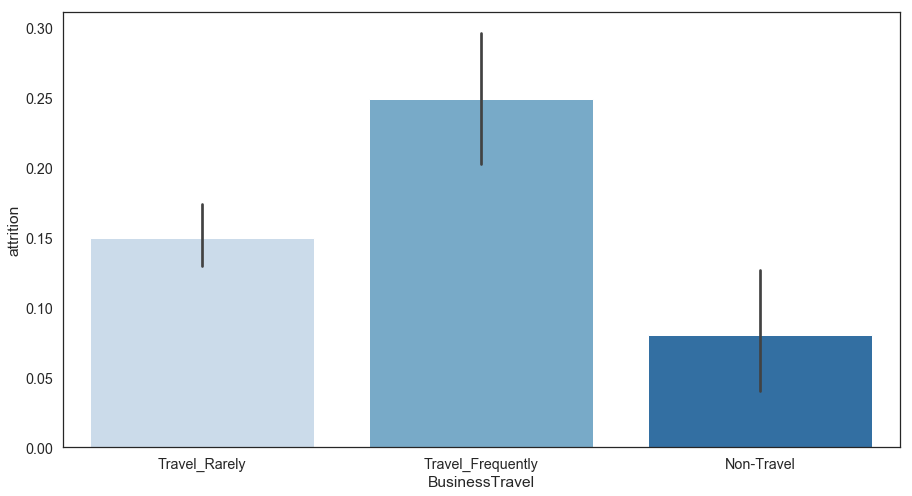

In [56]:
fig, ax = plt.subplots(1, figsize=(15, 8))
sns.barplot(x='BusinessTravel', y='attrition', data=attrition_data, palette="Blues")
plt.show()

The bar graph above also shows a trend that the more one travels, the more the individual is likely to have Attrition/Yes.   

***

Finally, One-Way ANOVA will be performed to test the following hypotheses for each column analyzed above:  

(1) The DistanceFromHome:  
    H0: The commuting distance does not affect job attrition.  
    H1: The commuting distance does affect job attrition (H0 is not True).  
    
(2) MaritalStatus:  
    H0: The marital status does not affect job attrition.  
    H1: The marital status distance does affect job attrition (H0 is not True).  
    
(3) OverTime:  
    H0: The overtime does not affect job attrition.  
    H1: The overtime does affect job attrition (H0 is not True).  
    
(4) BusinessTravel:  
    H0: The business travel frequency does not affect job attrition.  
    H1: The business travel frequency does affect job attrition (H0 is not True).  
    
***  

First, testing for (1) The DistanceFromHome:  
    H0: The commuting distance does not affect job attrition.  
    H1: The commuting distance does affect job attrition (H0 is not True).  


In [57]:
distance = pd.crosstab(attrition_data['Attrition'], attrition_data['DistanceRange'], 
                       margins=True, normalize=True)
distance * 100

DistanceRange,5.0,10.0,15.0,20.0,25.0,All
Attrition,,,,,,
No,33.333333,21.564626,9.795918,6.938776,12.244898,83.877551
Yes,5.238095,3.809524,2.108844,1.632653,3.333333,16.122449
All,38.571429,25.374150,11.904762,8.571429,15.578231,100.000000


In [58]:
distances = []
mind = int(attrition_data['DistanceRange'].min())
maxd = int(attrition_data['DistanceRange'].max())
for d in range(mind, maxd + 1, 5):
  dist = attrition_data.loc[attrition_data['DistanceRange'] == d, 'attrition']
  distances.append(dist)
  # anova needs a list to be paassed onto
print(len(distances))
stats.f_oneway(*distances)

5


F_onewayResult(statistic=2.227412086976853, pvalue=0.0639418609871053)

The p-value=0.063, meaning that I cannot reject the null hypothesis.

The p-value=0.063, meaning that I cannot reject the null hypothesis.

The above was an unintuitive result for me as I would have guessed that the longer the travel,  the more attention is likely.  That said, a potential explanation to this is that even the longest commuting distance, the29 in the dataset, the one must travel (assuming it is in miles) may not be considered too much of a commute after all.  For the country such as the United States, 29miles are not a long distance if there is highway access.  The commuting distance also is correlated to whether the company is located in a city,  where there is constant heavy traffic, or located in a rural area with no traffic at all.   Either way, it is an interesting result.  

***  

Next, testing for (2) MaritalStatus:  
    H0: The marital status does not affect job attrition.  
    H1: The marital status distance does affect job attrition (H0 is not True).  

In [59]:
mss = []
for val in attrition_data['MaritalStatus'].unique():
  ms = attrition_data.loc[attrition_data['MaritalStatus'] == val, 'attrition']
  mss.append(ms)
  
print(len(mss))
stats.f_oneway(*mss)

3


F_onewayResult(statistic=23.78156546845813, pvalue=6.850067559825624e-11)


Based on the p-value=6.85e-11, and I can safely reject the null hypothesis, meaning that H1 is true -The marital status distance does affect job attrition.  

For the potential reasons discussed earlier, 
they may be a variety of causes to why MaritalStatus does affect job attrition.  As the Single group is the most likely to have job attrition, this may be related to Age rather than the MaritalStatus in itself.  

***  

The next, testing for (3) OverTime:  
    H0: The overtime does not affect job attrition.  
    H1: The overtime does affect job attrition (H0 is not True).  
    

In [60]:
ots = []
for val in attrition_data['OverTime'].unique():
  ot = attrition_data.loc[attrition_data['OverTime'] == val, 'attrition']
  ots.append(ot)
  # anova needs a list to be paassed onto
print(len(ots))
stats.f_oneway(*ots)

2


F_onewayResult(statistic=94.65645707175152, pvalue=1.0092540336562444e-21)


Based on the very low pvalue=1.0092540336562444e-21, I can safely reject the null hypothesis (H0: The overtime does not affect job attrition), meaning that the overtime does affect job attrition.
This is an intuitive result, as I know based on my own experience that too long of working hours can lead to 'burn out,' pointing to the workers to resign.  

***  

Finally, testing for (4) business travel:  
    H0: The business travel frequency does not affect job attrition.  
    H1: The business travel frequency does affect job attrition (H0 is not True).  
    

In [61]:
bts = []
for val in attrition_data['BusinessTravel'].unique():
  bt = attrition_data.loc[attrition_data['BusinessTravel'] == val, 'attrition']
  bts.append(bt)
  
print(len(bts))
stats.f_oneway(*bts)

3


F_onewayResult(statistic=12.26835294184309, pvalue=5.1998333569549645e-06)

Based on the pvalue=5.1998333569549645e-06, I can safely reject the null hypothesis (the business travel frequency does not affect job attrition.), meaning that the business travel frequency does affect job attrition.  This is also a straightforward result, again based my own experiences.  
Traveling frequently can only enjoyable if they are for leisure.  Being stuck at a meeting room outside one's own country, is the same as being held in the office at home.  
    

***  
***

### <font color="darkblue">4. Gender and Age Differences in Attrition: ###

#### <font color="darkblue">(1) Gender and Attrition: ####
    
First, a pivot table by count and crosstab by percentages are created as a summary view.  To do so, I first created the below pivot table, which was later added with additional columns with percentages (no_percent, and yes_percent).  The total_prcnt column is also created for a  complete view.  
    

In [62]:
attrition_by_gender = attrition_data.pivot_table(index='Gender', columns='Attrition', values='Age',
                                                 aggfunc='count', margins=True)
attrition_by_gender
# Add precentage so that it is easier to see the ratios --> Do later.

Attrition,No,Yes,All
Gender,,,
Female,501,87,588
Male,732,150,882
All,1233,237,1470


In [63]:
gender = pd.crosstab(attrition_data['Gender'], attrition_data['Attrition'], margins=True, normalize=True)
gender * 100

Attrition,No,Yes,All
Gender,,,
Female,34.081633,5.918367,40.0
Male,49.795918,10.204082,60.0
All,83.877551,16.122449,100.0


To visualize Gender and Attrition, the sns.countplot was used.  This is because both the columns are
for categorical values: Attrtion: Yes/No, and Gender: Female/Male.  

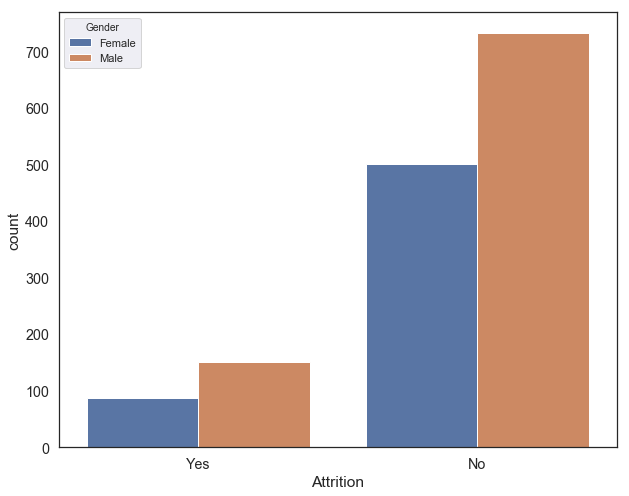

In [64]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.countplot(x='Attrition', hue="Gender", data=attrition_data)

First, as mentioned earlier, the ration in Attrition (both genders combined) is Attrition/Yes with 16%, and Attrition/No with 84%.  

Taking the results from the crosstab above, in which Looking at the output above, the ratios for the Attrition/Yes and Attrition/No in respective gender are approximately 40% for female and 60% for male.  
H0: The two categorical data (Gender and Attrition) 5.9% of Attrition/Yes is female while 10.2 of Attrition/Yes is male.  It suggests that the out of 16%, the total Attrition/Yes, about 37% are female while the rest, 63% are male, similar to the proportion of female : male, 4 : 6, included in the dataset, which suggests the following hypothesis:


H0: The two categories (Attrition and Gender) are independent of each other.
H1: The two categories (Attrition and Gender) are not independent of each other (H0 is not True).  

To test these categorical values, the following Chi-Square test is performed:  

In [65]:
# Insert your code here
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(attrition_by_gender)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

### The code needs to be convered from numbers to string values. 

chi2 =  1.2752163602205182
p-val =  0.8655661914618858
degree of freedom =  4
Expected:


,0,1,2
0,493.2,94.8,588.0
1,739.8,142.2,882.0
2,1233.0,237.0,1470.0


Looking at the p-value =  0.8655661914618858, there is strong evidence for the null hypothesis (H0: the two categorical data (Gender and Attrition) are independent of each other. Therefore, I cannot reject the null hypothesis.  

This test result indicates that the potential gender difference I thought we might see is a chance, not due to a dependency that exists between the two.  

My prior was that there is a gender difference in job attrition as I assumed that the female working population is more vulnerable to it due to various social challenges in and outside work women face.  However, after the analysis and the test result, I can deduce that there is no apparent gender difference in attrition because of a self-selecting nature of career options women may be making.  For instance, if a woman knows the most of the family obligations fall onto her shoulder (if she has a family with children), she may not choose the type of work that is likely to make her more hectic to the level that she would end up leaving her workplace.  She may not want a kind of work that is known to have a lot of overtime, business travels, etc.  
Perhaps, this result is also an indication that the dataset has high dimensionality, as many of the factors are hard to separate and interdependent.  
 

***  


#### <font color="darkblue">(2) Age and Attrition: ####  
    
Finally, Age and Attrition will be analyzed.  But first, a new colum, AgeRange will be created to categorize 
the age data in 'Age' column, which ranges between 18 and 60.  The ragnes are divided by 5-year interval, 
    except the first age range (18-25).      

In [66]:
step = 5
for start in range(25, attrition_data['Age'].max(), step):
  age_rows = (attrition_data['Age'] >= start) & (attrition_data['Age'] <= start + step)
  if start + step > 59:
    attrition_data.loc[age_rows, 'Age'] = 60
  else:
    attrition_data.loc[age_rows, 'AgeRange'] = start + step
attrition_data.loc[attrition_data['Age'] <= 25, 'AgeRange'] = 25

attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeBracket,attrition,DistanceRange,AgeRange
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,0,1,6,4,0,5,7500.0,1,5.0,45.0
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,3,3,10,7,1,7,7500.0,0,10.0,50.0
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,2500.0,1,5.0,40.0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,3,8,7,3,0,5000.0,0,5.0,35.0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,3,2,2,2,2,5000.0,0,5.0,30.0


  
Using the newly created column, 'AgeRange', the following pivot table with percentages is created as an overview.  

  

In [67]:
attrition_by_age = attrition_data.pivot_table(index='AgeRange', columns='Attrition', values='Gender',
                                                 aggfunc='count', margins=True)

In [68]:
attrition_by_age = attrition_by_age.rename(index={'All': 'Total'}, columns={'All': 'Total'})
attrition_by_age.loc[:, 'no_prcnt'] = (attrition_by_age.loc[:, 'No'] / attrition_by_age.loc[:, 'Total']) * 100
attrition_by_age.loc[:, 'yes_prcnt'] = (attrition_by_age.loc[:, 'Yes'] / attrition_by_age.loc[:, 'Total']) * 100
attrition_by_age.loc[:, 'total_prcnt'] = (attrition_by_age.loc[:, 'Total'] / attrition_by_age.loc[:, 'Total']) * 100
attrition_by_age

Attrition,No,Yes,Total,no_prcnt,yes_prcnt,total_prcnt
AgeRange,,,,,,
25.0,79,44,123,64.227642,35.772358,100.0
30.0,156,47,203,76.847291,23.152709,100.0
35.0,266,59,325,81.846154,18.153846,100.0
40.0,267,30,297,89.898990,10.101010,100.0
45.0,187,21,208,89.903846,10.096154,100.0
50.0,128,13,141,90.780142,9.219858,100.0
55.0,111,15,126,88.095238,11.904762,100.0
Total,1194,229,1423,83.907238,16.092762,100.0


*** 
First, a histogram with KDE for age distribution is plotted.  



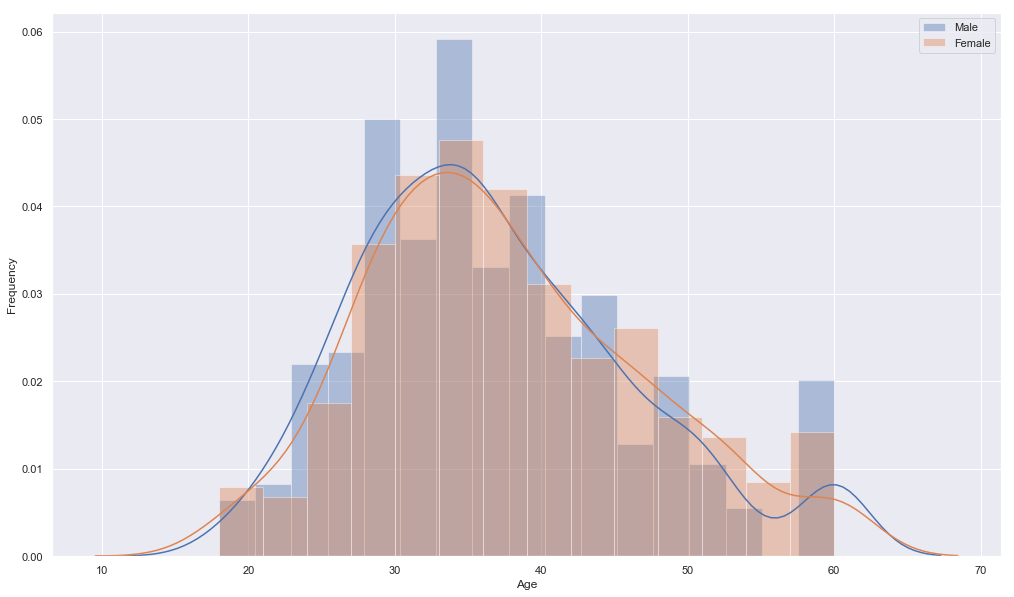

In [69]:
# Plot Female and Male in same plot
fig, axes = plt.subplots(1, 1, figsize=(17, 10))
attrition_data_M = attrition_data.loc[attrition_data['Gender'] == 'Male']
attrition_data_F = attrition_data.loc[attrition_data['Gender'] == 'Female']

sns.distplot(attrition_data_M[['Age']], axlabel=None, label='Male')
sns.distplot(attrition_data_F[['Age']], axlabel=None, label='Female')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The above age distributions show normal distributions for both genders, where the age range for the highest frequencies occurring are between the 30s and 40s.  

***

The following count plot is plotted for AgeRage and Attrition.  

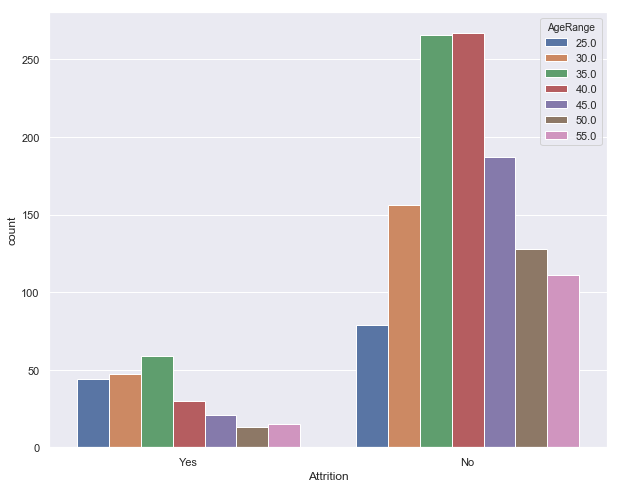

In [70]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.countplot(x="Attrition", hue="AgeRange", data=attrition_data)

Though the y-axis is the total count for the each AgeRange, the graph for Attrition/No appears similar to the KDE normal curve for AgeRange plotted earlier.  However, for the Attrition/Yes, the younger age groups, the 20s, and the 30s have higher counts than the older age groups, the 40s and above.  

The result is curious as an earlier discussion on the marital status, and attrition mentions the higher job attrition for the Single group may be the result of the relationship between the age and erosion.  


***  

Based on this observation, I will hypothesize the following:

H0: Age has no effect in attrition.  
H1: Age does have an effect in attrition.  

To test the hypothesis, the following One-Way ANOVA is performed.  


In [71]:
ages = []
mina = int(attrition_data['AgeRange'].min())
maxa = int(attrition_data['AgeRange'].max())
for a in range(mina, maxa + 1, 5):
  age = attrition_data.loc[attrition_data['AgeRange'] == a, 'attrition']
  ages.append(age)
  # anova needs a list to be paassed onto
print(len(ages))
stats.f_oneway(*ages)

7


F_onewayResult(statistic=11.07747452064328, pvalue=4.226676719467157e-12)

Based on the pvalue=4.226676719467157e-12, there is strong evidence against the null hypothesis (H0: Age does not affect attrition).  Therefore, I can safely reject the null hypothesis and accept the alternative hypothesis, H1: Age does affect attrition.  

***  
This concludes the analysis of the four exploratory questions.  

Next, a correlation heat map is created for the numerical data to see interdependencies among numeric data attributes.   

***  
### <font color="darkblue">Visualizing Correlations for numerical data: ###  



Creating a heatmap to show the correaltions within the number_data:  

In [72]:
num_data_correlation = number_data.corr()
num_data_correlation

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.024287,0.509604,0.497855,0.028051,0.299635,0.003634,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,0.023381,0.002966,0.007707,-0.032182,0.038153,0.022704,0.042143,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.031131,0.005303,-0.017014,0.027473,-0.029251,0.040235,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
HourlyRate,0.024287,0.023381,0.031131,1.000000,-0.027853,-0.015794,-0.015297,0.022157,-0.009062,0.050263,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
JobLevel,0.509604,0.002966,0.005303,-0.027853,1.000000,0.950300,0.039563,0.142501,-0.034730,0.013984,0.782208,-0.018191,0.534739,0.389447,0.353885,0.375281
MonthlyIncome,0.497855,0.007707,-0.017014,-0.015794,0.950300,1.000000,0.034814,0.149515,-0.027269,0.005408,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,-0.015297,0.039563,0.034814,1.000000,0.017521,-0.006429,-0.034323,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.038153,-0.029251,0.022157,0.142501,0.149515,0.017521,1.000000,-0.010238,0.030075,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.022704,0.040235,-0.009062,-0.034730,-0.027269,-0.006429,-0.010238,1.000000,0.007528,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985
StockOptionLevel,0.037510,0.042143,0.044872,0.050263,0.013984,0.005408,-0.034323,0.030075,0.007528,1.000000,0.010136,0.011274,0.015058,0.050818,0.014352,0.024698


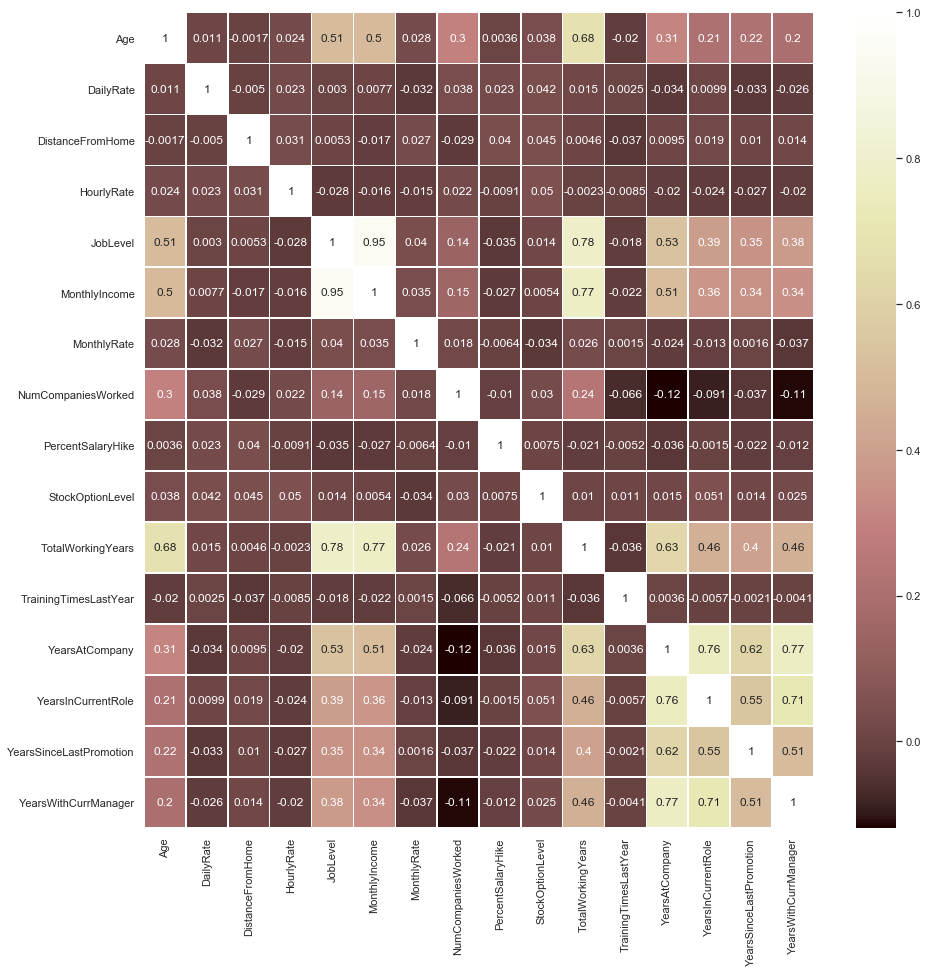

In [73]:
f, ax = plt.subplots(figsize=(15, 15))
num_data_correlation_map = sns.heatmap(num_data_correlation, annot=True, linewidths=.5, ax=ax, cmap="pink")
num_data_correlation_map     # Should I include 'StandardHours'???


The results:  
The following is the list of the clumns (attributes) in the order of highest correlations:  
(1) JobLevel and MonthlyIncome (0.95)  
(2) JobLevel and TotalWorkingYears (0.78)  
(3) MonthlyIncome and TotalWorkingYears (0.77)  
(4) YearsAtCompany and YearsWithCurrManager (0.77)  
(5) YearsAtCompany and YearsInCurrentRole (0.76)  
(6) YearsWithCurrManager and YearsInCurrentRole (0.71)  


Analysis and interpretations:  
* JobLevel is highly correlated to MonthlyIncome and TotalWorkingYears: This result is likely because that the longer you serve, the higher you are likely to be promoted.  And higher the position is, the more one is likely to earn as well.  This expected result also explains the high correlation in (3) MonthlyIncome and TotalWorkingYears (0.77).  

* Some of the "Years" columns are highly correlated with each other.  For example, YearsAtCompany is highly correlated to YearsWithCurrentManager and YearsInCurrentRole.  These correlations are interesting in that YearsAtCompany can be affected either positively and negatively.  For instance, if YearsAtCompany is long, it may also be the case that YearsWithCurrManager if you like working for your manager.  

But the opposite can be true, and both YearsAtCompany and YearsWithCurrManager may be short if you do not like working for your manager.  A similar case can be made for the relationship between YearsWithCurrManager and YearsInCurrentRole.  

The critical thing to note as result of this correlation map is that there appear to be many interrelationships at work, which makes the analysis challenging.

***  


### Investigating Correlation for categorical data: ###
*** 
Several columns have categorical data as follows:  
Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'  
EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'  
JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'  
JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'  
PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'  
RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'  
WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'  

In [74]:
categorical_data_correlation = categorical_data.corr()

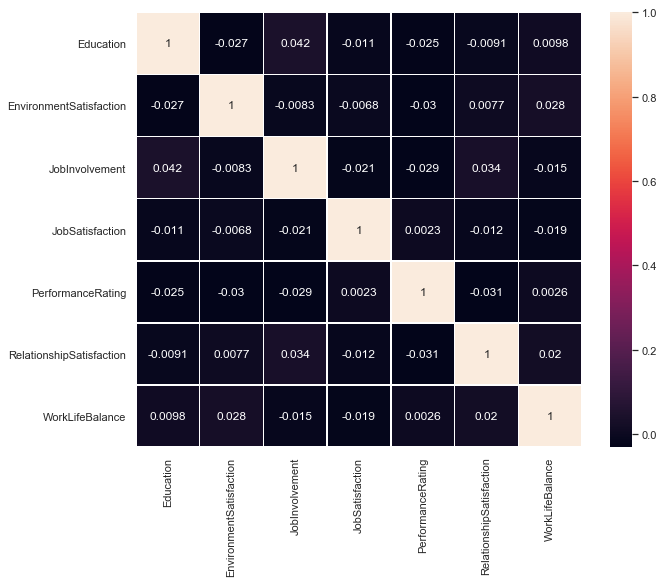

In [75]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(categorical_data_correlation, annot=True, linewidths=.5, ax=ax)

Result: The above map did not show anything interesting in terms of correlations.  It is because that the columns are categorical.  The correlation mapping is not suitable for the categorical data.

***  
***  


***  
***

## K-Means (Clustering) ## 

This section experimental to see if a quick K-Means Clustering would yield any interesting clusters.

Process:  
(1) Use the rule of the thumb to calculate the number of potential clusters.  
(2) The elbow plot will be drawn.  
(3) To analyze categorical data for K-Means Clustering, the column, 'Gender' Female/Male needs
to be convered in 0 and 1 while Attrition column needs to be dropped for elbow plot.  
The attrition column, 'Attrtion' column will be later convered to Yes:1 and No:0 and used 

In [76]:
ruleofthumb = np.sqrt(1470)
ruleofthumb

38.34057902536163

The rule of thum suggests that the number of cluster is 38.  

***  


In [77]:
categorical_data.loc[:, 'Gender'] = categorical_data.replace({'Male': 1, 'Female': 0})
dropped_attrition = categorical_data.drop('Attrition', axis=1)
dropped_attrition.head()

,Gender,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
EmployeeNumber,,,,,,,,
1,0,2,2,3,4,3,1,1
2,1,1,3,2,2,4,4,3
4,1,2,4,2,3,3,2,3
5,0,4,4,3,3,3,3,3
7,1,1,1,3,2,3,4,3


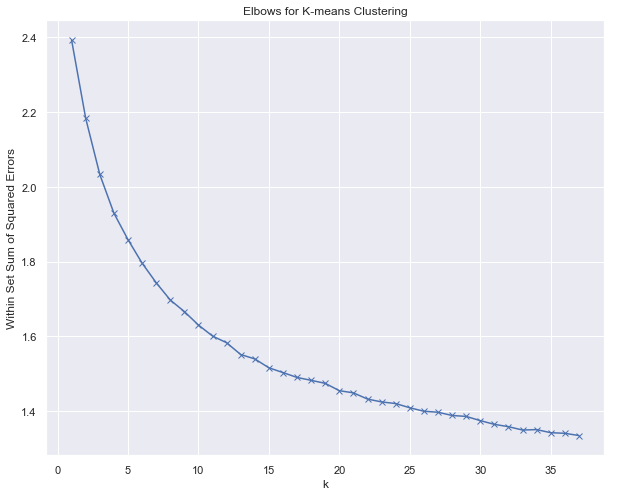

In [78]:
### K-means may be sufficient.
import sklearn as sk
from sklearn import metrics

# Insert your code here
#sklearn.metrics.silhouette_score(X, labels, metric=’euclidean’
#, sample_size=None, random_state=None, **kwds)


from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


#K-means: Derermine K:
distortions = []
K = range(1,38)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dropped_attrition)
    distortions.append(sum(np.min(cdist(dropped_attrition, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dropped_attrition.shape[0])

# Elbow:
fig, axix = plt.subplots(figsize=(10, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Within Set Sum of Squared Errors')
plt.title('Elbows for K-means Clustering')
plt.show()



The above elbow plot suggests the 5 cluster, which will be used below.  The resulting clusters with respective assigned cluster numbers are added in kmeans_2 column below.  

In [79]:
dropped_attrition = categorical_data.drop('Attrition', axis=1)
dropped_attrition.head()

,Gender,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
EmployeeNumber,,,,,,,,
1,0,2,2,3,4,3,1,1
2,1,1,3,2,2,4,4,3
4,1,2,4,2,3,3,2,3
5,0,4,4,3,3,3,3,3
7,1,1,1,3,2,3,4,3


In [80]:
categorical_data.loc[:, 'Attrition'] = categorical_data.replace({'Yes': 1, 'No': 0})

In [81]:
#K-means: Derermine K:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(categorical_data)
categorical_data.loc[:, 'kmeans_2'] = kmeanModel.predict(categorical_data)
categorical_data.loc[:, 'Attrition'] = categorical_data['Attrition']
categorical_data.head(20)

,Attrition,Gender,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,kmeans_2
EmployeeNumber,,,,,,,,,,
1,1,0,2,2,3,4,3,1,1,0
2,0,1,1,3,2,2,4,4,3,0
4,1,1,2,4,2,3,3,2,3,0
5,0,0,4,4,3,3,3,3,3,4
7,0,1,1,1,3,2,3,4,3,0
8,0,1,2,4,3,4,3,3,2,0
10,0,0,3,3,4,1,4,1,2,3
11,0,1,1,4,3,3,4,2,3,0
12,0,1,3,4,2,3,4,2,3,4


Together with K-clustering, the following PCA is performed with the 3D visualized result.  

In [82]:
pca_model = skd.PCA().fit(dropped_attrition)
pca_model.components_.shape

(8, 8)

In [83]:
pca_model.explained_variance_
# the first four variances below are explaiend well by pca.

array([1.22597269, 1.20092464, 1.16465519, 1.04299838, 0.50954755,
       0.49158964, 0.23947231, 0.12964874])

  
As the above results from .explained_varience_shows, the four variances are qualified (the numbers above 1.0) and explained well by PCA: 1.22597269, 1.20092464, 1.16465519, 1.04299838   



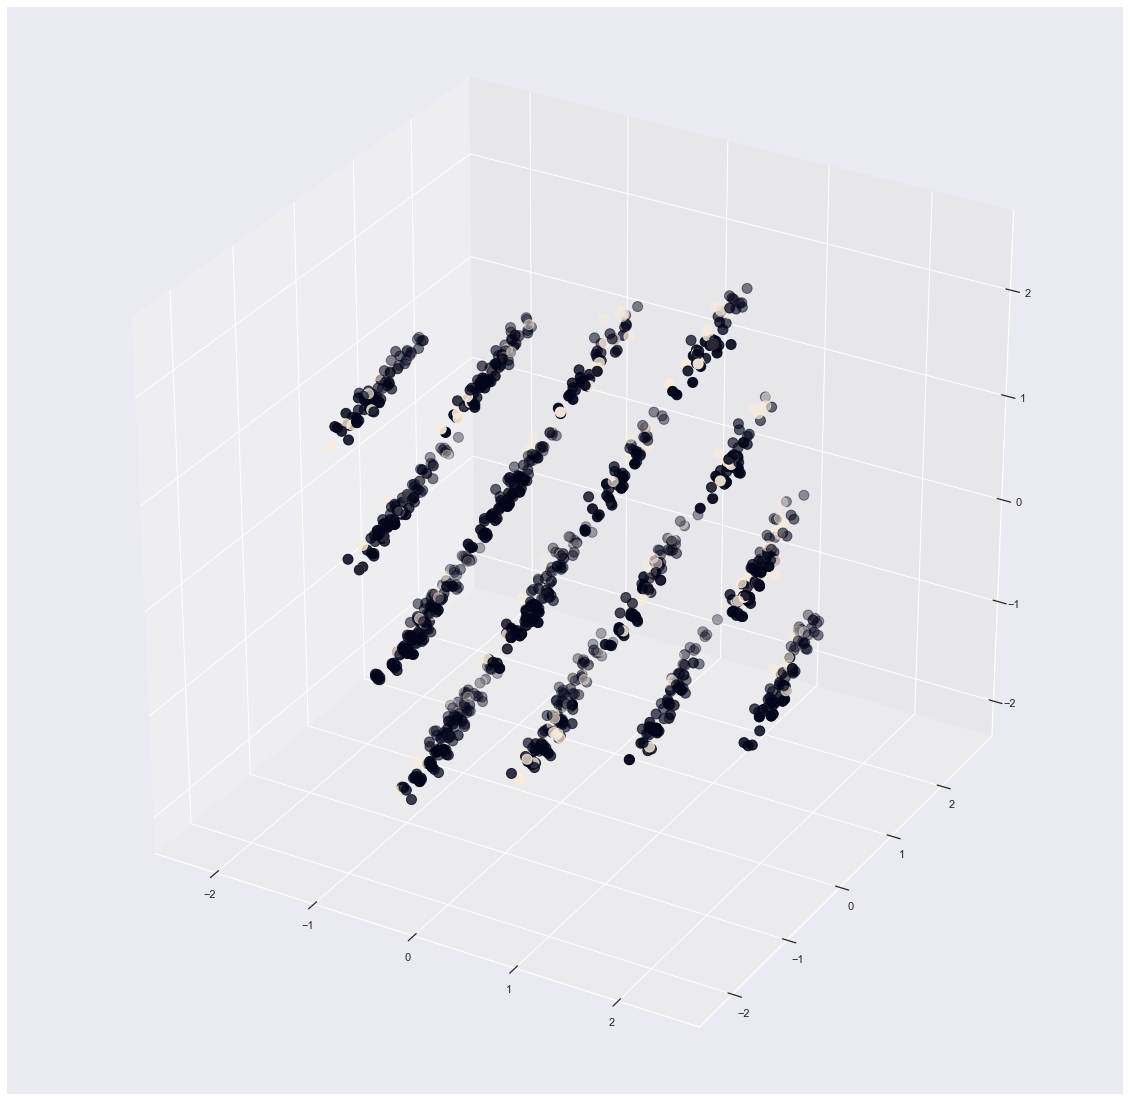

In [84]:
X = pca_model.transform(dropped_attrition)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=categorical_data['Attrition'].astype('category'), s=100)

for i, s in enumerate(categorical_data.index):
    x, y, _ = proj3d.proj_transform(X[i,0],X[i,1],X[i,2],
                                    ax.get_proj())
    #plt.annotate(s, xy=(x-0.005,y+0.002), fontsize=1)

Unfortunately, no apparent patterns were found, which may be due to the fact that the dataset has cerain complexies that could not have beene explained within the 3D space.

***  
***  

Next, as the final task, Random Forest Classification is performed to calculate the feature importance for Attrition.  


## Classifications ###  
***

### Random Forest to predict most important features for 'Attrition': ###


In [85]:
# First, perform random forest the way it is, and can perform with pd.get_dummies for (e.g.) JobLevel.
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_data = pd.concat([number_data, categorical_data], axis=1)
rf_data.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Attrition,Gender,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,kmeans_2
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,94,2,5993,19479,8,11,0,...,1,0,2,2,3,4,3,1,1,0
2,49,279,8,61,2,5130,24907,1,23,1,...,0,1,1,3,2,2,4,4,3,0
4,37,1373,2,92,1,2090,2396,6,15,0,...,1,1,2,4,2,3,3,2,3,0
5,33,1392,3,56,1,2909,23159,1,11,0,...,0,0,4,4,3,3,3,3,3,4
7,27,591,2,40,1,3468,16632,9,12,1,...,0,1,1,1,3,2,3,4,3,0


In [87]:
X = rf_data.drop(['Attrition', 'kmeans_2'], axis=1)
y = rf_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
feat_importance = sorted(list(zip(X_train.columns, model.feature_importances_)), key=lambda x: x[1], reverse=True)
feat_importance

[('MonthlyIncome', 0.09353001951609435),
 ('Age', 0.07843108216122874),
 ('TotalWorkingYears', 0.06520415366879705),
 ('DailyRate', 0.06510647577170975),
 ('MonthlyRate', 0.06110261862996188),
 ('HourlyRate', 0.05943864579318988),
 ('DistanceFromHome', 0.04894842371315724),
 ('YearsAtCompany', 0.04873629837950868),
 ('StockOptionLevel', 0.048159305864175446),
 ('NumCompaniesWorked', 0.04521198903427936),
 ('PercentSalaryHike', 0.044120409330771396),
 ('YearsInCurrentRole', 0.0373857050065836),
 ('YearsWithCurrManager', 0.034320369640363925),
 ('EnvironmentSatisfaction', 0.032799854130236894),
 ('TrainingTimesLastYear', 0.03233569276076602),
 ('RelationshipSatisfaction', 0.030208626538330563),
 ('JobSatisfaction', 0.029947524254720456),
 ('YearsSinceLastPromotion', 0.028488230508163223),
 ('JobInvolvement', 0.026807210912108845),
 ('WorkLifeBalance', 0.024914838848898176),
 ('JobLevel', 0.023373478839356938),
 ('Education', 0.0227541962234088),
 ('Gender', 0.013730307631885619),
 ('Perf


***  

The results obtained from the calculation (n the order of the importance) is as follows:  
 (1) 'MonthlyIncome', 0.09620026433543806,  
 (2) 'Age', 0.07465100132268015,  
 (3) 'MonthlyRate', 0.0678728429991805,  
 (4) 'DailyRate', 0.06395539641367105,  
 (5) 'HourlyRate', 0.060778294100276326,  
 (6) 'TotalWorkingYears', 0.059386776367443835,  
 (7) 'DistanceFromHome', 0.05537957826054828,  
 (8) 'YearsAtCompany', 0.04897909582304177,  
 (9) 'StockOptionLevel', 0.04782603253763362,  
 (10) 'PercentSalaryHike', 0.04393563135475805,  
 (11) 'NumCompaniesWorked', 0.04368879940471908,  
 (12) 'YearsWithCurrManager', 0.037408724867448895,  
 (13) 'YearsInCurrentRole', 0.036640647371725926,  
 (14) 'TrainingTimesLastYear', 0.034674160760093234,  
 (15) 'JobSatisfaction', 0.0322863585903226,  
 (16) 'EnvironmentSatisfaction', 0.03193999230375698,  
 (17) 'YearsSinceLastPromotion', 0.029594830954866907,  
 (18) 'RelationshipSatisfaction', 0.027932283322458836,  
 (19) 'JobInvolvement', 0.025080256516368957,  
 (20) 'Education', 0.025006182546777035,  
 (21) 'WorkLifeBalance', 0.02088513349853633,  
 (22) 'JobLevel', 0.020547005053445814,  
 (23) 'Gender', 0.011329291160433025,  
 (24) 'PerformanceRating', 0.004021420134374657  

***  

Finally, the accuracy score is calculated to see if the results are reliable.


In [89]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.854875283446712)

Result: The accuracy score indicates that 0.85 (85%) is classified correctly, which is a high score knowing the score higher than 50% is considered a good score.  

(End of Report)